In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [40]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0593f13bc1574b72883574818253e41a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TR8WqnBbvEq-LuUF8Z2HiYMP0L-OonThDQeEgxhVVxmz',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0593f13bc1574b72883574818253e41a.get_object(Bucket='lifeexpectancymodel-donotdelete-pr-ukltcnhj3flx6s',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
life_data = pd.read_csv(body)
life_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [41]:
life_data = life_data.drop('Year', axis = 1)

In [42]:
life_data['Status'] = life_data['Status'].astype('category')
life_data['Status'] = life_data['Status'].cat.codes

In [43]:
life_data['Country'] = life_data['Country'].astype('category')
life_data['Country'] = life_data['Country'].cat.codes

In [44]:
life_data = life_data.groupby('Country').mean()

In [45]:
life_data.columns
life_data.dtypes

Status                                int8
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
 BMI                               float64
under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [46]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)

In [47]:
life_features.isnull().sum()

Status                              0
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
dtype: int64

In [48]:
life_features.fillna(value = life_features.mean(), inplace = True)

In [49]:
life_labels.fillna(value = life_labels.mean(), inplace = True)

In [51]:
life_features.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
0,1,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,1,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,1,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,1,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,1,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,1.257006e+07,3.42500,3.37500,0.488625,8.84375


In [53]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(life_features, life_labels, train_size = 0.7, test_size = 0.3)

In [54]:
linear_model = LinearRegression()
linear_model.fit(life_features_train, life_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
print('R_square score on the training: %.2f' % linear_model.score(life_features_train, life_labels_train))


R_square score on the training: 0.93


In [56]:
linear_model_predict = linear_model.predict(life_features_test)

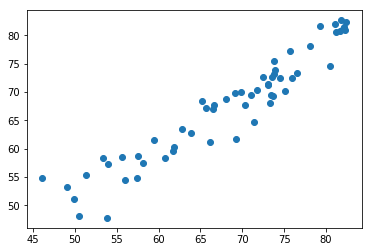

In [57]:
import matplotlib.pyplot as plt
plt.scatter(life_labels_test,linear_model_predict)

In [58]:
life_features_test

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
100,1,424.437500,37.1250,0.919333,25.849706,89.571429,7559.4375,16.78125,58.7500,89.0625,6.658667,83.6250,16.68125,237.504042,6.700263e+06,7.11875,6.98750,0.410625,10.231250
11,1,65.375000,0.0000,1.934667,602.087140,98.125000,6.6875,51.65625,0.0000,98.0000,3.807333,98.0625,0.10000,11191.247421,1.257006e+07,6.10625,5.95000,0.807937,14.112500
137,1,76.187500,2.1250,8.855333,0.000000,95.125000,3548.4375,23.24375,2.5625,91.2500,5.912000,96.0625,0.10000,7223.452050,1.257006e+07,1.53750,1.01875,0.629502,11.894097
4,1,127.500000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,1.257006e+07,3.42500,3.37500,0.488625,8.843750
62,1,249.625000,3.0000,2.134667,0.000000,95.375000,41.2500,20.30000,5.6875,92.7500,5.308667,88.5000,2.34375,7223.452050,1.257006e+07,7.58750,7.50625,0.420188,8.125000
184,0,58.187500,26.1875,8.579333,0.000000,81.375000,130.6250,58.45000,30.7500,82.1250,15.863333,95.1250,0.10000,7223.452050,1.257006e+07,0.73125,0.60625,0.629502,11.894097
0,1,269.062500,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.212500
159,1,346.312500,27.7500,4.439915,8.241077,31.000000,315.7500,39.55453,43.2500,44.0000,2.710000,47.0000,3.69375,1092.233631,3.750827e+06,4.68287,4.71078,0.131688,1.531250
164,1,339.000000,2.6250,4.463333,278.099713,76.000000,49.1250,25.50000,3.6875,89.0000,7.308667,83.7500,32.94375,2165.090838,4.573031e+05,6.47500,6.63125,0.515688,10.350000


In [19]:
linear_model_predict


array([54.86200324, 61.79337765, 73.09863254, 59.58440907, 70.91732468,
       76.68961743, 56.48072366, 80.51710152, 72.12322879, 71.6031013 ,
       58.98815128, 67.97922114, 68.6763352 , 58.58151888, 61.54058379,
       77.27556115, 74.93964615, 73.36754637, 59.0095045 , 77.79555022,
       58.17819586, 68.54675362, 60.9616221 , 55.06497467, 51.86123437,
       62.14211339, 71.49440473, 69.36030358, 64.71353509, 81.3965083 ,
       67.24580584, 71.60367308, 68.17990828, 70.03889821, 68.85737681,
       70.50073939, 64.2055915 , 77.56583202, 68.93035163, 73.14286437,
       82.17075666, 75.98489667, 69.36472831, 43.46737182, 70.54902452,
       71.66573248, 65.52515783, 77.9977201 , 59.35123237, 59.95392106,
       80.20407711, 71.9224173 , 77.85113242, 58.11622723, 72.57725732,
       82.98824541, 66.94989115, 56.31561678])

In [20]:
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))

Coefficients: 
 [ 6.11511064e-01 -5.27589641e-02  3.69516603e-02  2.14458680e-01
  4.43166687e-04 -8.81149905e-03  1.17868548e-06  1.36675076e-02
 -3.49560839e-02 -4.36981335e-02  2.67604028e-01  1.05860219e-01
 -2.05212683e-01  1.65804638e-06  1.91945609e-08  2.16370114e-01
 -2.78398901e-01  5.75498010e+00  1.68537384e-01]
Mean squared error: 9.63
Mean absolute error: 2.41
R_square score: 0.89


In [21]:
!pip install watson-machine-learning-client

In [22]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-05-27 10:47:48,460 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [23]:
wml_credentials={
  "apikey": "VO4xXoma5cFogV_S3KqlzZEwq7NuBrcYmbiVlATgAw4u",
  "instance_id": "6886d68f-48a9-4ee8-be00-af751a5928f6",
  "password": "57b62be0-9add-4e3d-9ce9-9667b47fbe68",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "91ab6b2d-f1d7-4240-a523-9d2bd106d70e"
}

In [24]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [25]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Charan", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "mcharanreddy1997@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpec"}

In [26]:
model_artifact =client.repository.store_model(linear_model, meta_props=model_props)

In [27]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [28]:
deployment = client.deployments.create(published_model_uid, name="LifeExpec")



#######################################################################################

Synchronous deployment creation for uid: 'd6eec3fc-4552-4d8c-b521-66b6142f2811' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='bdef325a-9649-4baa-a08e-9b20ac0c532f'
------------------------------------------------------------------------------------------------




In [29]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [30]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/6886d68f-48a9-4ee8-be00-af751a5928f6/deployments/bdef325a-9649-4baa-a08e-9b20ac0c532f/online'